In [1]:
import zipfile
# # Unzip the downloaded file
# zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
# zip_ref.extractall()
# zip_ref.close()

In [1]:
ls "pizza_steak/test"

 Volume in drive C is Windows
 Volume Serial Number is 4A11-2C92

 Directory of C:\Coding\Tensorflow_certification\Tensorflow_learning\learning_tensorflow\pizza_steak\test

11/02/2022  02:57 PM    <DIR>          .
11/02/2022  02:57 PM    <DIR>          ..
11/02/2022  02:57 PM    <DIR>          pizza
11/02/2022  02:57 PM    <DIR>          steak
               0 File(s)              0 bytes
               4 Dir(s)  71,947,587,584 bytes free


In [2]:
ls "pizza_steak/test/steak"

 Volume in drive C is Windows
 Volume Serial Number is 4A11-2C92

 Directory of C:\Coding\Tensorflow_certification\Tensorflow_learning\learning_tensorflow\pizza_steak\test\steak

11/02/2022  02:57 PM    <DIR>          .
11/02/2022  02:57 PM    <DIR>          ..
11/02/2022  02:57 PM            49,452 100274.jpg
11/02/2022  02:57 PM            68,761 1012080.jpg
11/02/2022  02:57 PM            84,650 1016217.jpg
11/02/2022  02:57 PM            54,239 1064847.jpg
11/02/2022  02:57 PM            69,069 1082384.jpg
11/02/2022  02:57 PM            35,181 108310.jpg
11/02/2022  02:57 PM            43,561 1094883.jpg
11/02/2022  02:57 PM            48,923 1107549.jpg
11/02/2022  02:57 PM            33,209 1118585.jpg
11/02/2022  02:57 PM            57,498 1163050.jpg
11/02/2022  02:57 PM           116,242 1166047.jpg
11/02/2022  02:57 PM            52,966 1190808.jpg
11/02/2022  02:57 PM            23,999 1194662.jpg
11/02/2022  02:57 PM            71,660 1206166.jpg
11/02/2022  02:57 PM      

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir, target_class):
    # Setup target directory (we'll view images from here)
    target_folder = target_dir+target_class

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)

    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");

    print(f"Image shape: {img.shape}") # show the shape of the image

    return img

Image shape: (384, 512, 3)


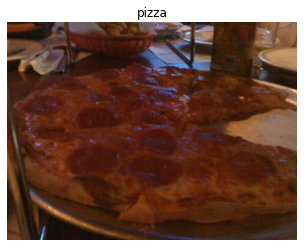

In [4]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

C:\Users\gonz3\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [6]:

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
    
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    
    tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
    
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    #Above and below are the same
    tf.keras.layers.Conv2D(10, 3), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
    tf.keras.layers.Activations(tf.nn.relu)
    
    tf.keras.layers.MaxPool2D(2),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
    ])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [7]:
# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 171ms/step - loss: 0.5674 - accuracy: 0.7167 - val_loss: 0.4013 - val_accuracy: 0.8400
Epoch 2/5
47/47 [==============================] - 7s 148ms/step - loss: 0.4296 - accuracy: 0.8020 - val_loss: 0.3878 - val_accuracy: 0.8180
Epoch 3/5
47/47 [==============================] - 7s 144ms/step - loss: 0.3927 - accuracy: 0.8327 - val_loss: 0.3234 - val_accuracy: 0.8820
Epoch 4/5
47/47 [==============================] - 7s 144ms/step - loss: 0.3750 - accuracy: 0.8353 - val_loss: 0.3205 - val_accuracy: 0.8880
Epoch 5/5
47/47 [==============================] - 7s 148ms/step - loss: 0.3341 - accuracy: 0.8667 - val_loss: 0.3110 - val_accuracy: 0.8700


In [15]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [8]:
# replicate a model from another note book & compare results 

In [10]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data, # use same training data created above
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))
# no better then guessing

Epoch 1/5
47/47 [==============================] - 7s 150ms/step - loss: 0.8696 - accuracy: 0.5033 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 7s 140ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 7s 144ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 7s 143ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 7s 140ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [16]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data, # use same training data created above
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 151ms/step - loss: 0.6849 - accuracy: 0.6587 - val_loss: 0.5616 - val_accuracy: 0.7120
Epoch 2/5
47/47 [==============================] - 7s 145ms/step - loss: 0.5420 - accuracy: 0.7427 - val_loss: 0.4610 - val_accuracy: 0.7920
Epoch 3/5
47/47 [==============================] - 7s 141ms/step - loss: 0.5033 - accuracy: 0.7607 - val_loss: 0.4526 - val_accuracy: 0.7920
Epoch 4/5
47/47 [==============================] - 7s 147ms/step - loss: 0.4654 - accuracy: 0.7920 - val_loss: 0.4462 - val_accuracy: 0.7800
Epoch 5/5
47/47 [==============================] - 7s 141ms/step - loss: 0.4675 - accuracy: 0.7840 - val_loss: 0.4407 - val_accuracy: 0.7840
